In [135]:
np.random.seed(0)
data = pd.DataFrame(np.random.normal(size=(100, 2)).cumsum(axis=0), 
                    columns=['var1', 'var2'])

<AxesSubplot: >

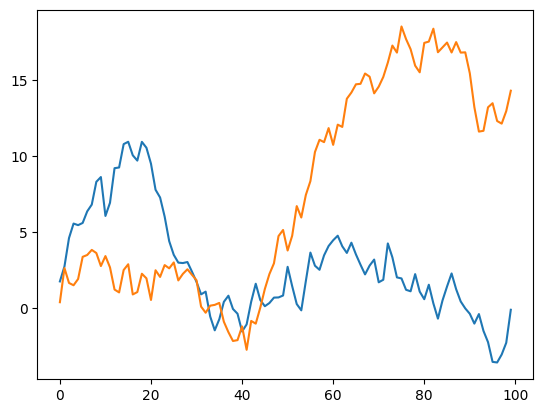

In [136]:
#plot variables va1 vs var2 with matplotlib
data.var1.plot()
data.var2.plot()

MOVING EXPANSIVE RECENT COINTEGRATION

In [137]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.stattools import coint

def plot_cointegration(df, var1, var2):
    # Subplots con dos filas y una columna
    fig = make_subplots(rows=2, cols=1)

    # Listas para guardar los resultados
    cointegrations = []
    p_values = []

    for i in range(5, len(df) + 1):  # comenzar desde 5 porque necesitamos al menos 5 puntos para calcular la cointegración
        df_tmp = df.iloc[-i:][[var1, var2]]
        coint_t, p_value, _ = coint(df_tmp[var1], df_tmp[var2])
        cointegrations.append(coint_t)  # estadístico de cointegración de la prueba Engle-Granger
        p_values.append(p_value)  # valor p de la prueba

    # Agregar los resultados al primer subplot
    fig.add_trace(go.Scatter(
        x=list(range(5, len(df) + 1)),  # número de observaciones
        y=cointegrations,  # cointegración
        mode='lines',
        name='Estadístico de cointegración a lo largo del tiempo',
    ), row=1, col=1)

    # Colores apagados para las líneas de los valores críticos
    colors = ['#D2B48C', '#FF7F50', '#B22222']

    # Agregar líneas horizontales para los valores críticos al primer subplot
    _, _, crit_value = coint(df[var1], df[var2])
    for i, key in enumerate(['1%', '5%', '10%']):
        fig.add_trace(
            go.Scatter(
                x=[5, len(df) + 1],
                y=[crit_value[i], crit_value[i]],
                mode='lines',
                name=f'Valor crítico al {key}',
                line=dict(color=colors[i], dash="dash"),
            ), 
            row=1, col=1
        )

    # Agregar los resultados al segundo subplot
    fig.add_trace(go.Scatter(
        x=list(range(5, len(df) + 1)),  # número de observaciones
        y=p_values,  # valor p
        mode='lines',
        name='Valor p a lo largo del tiempo',
    ), row=2, col=1)

    # Agregar una línea horizontal al segundo subplot para indicar el umbral de significancia de 0.05
    fig.add_trace(
        go.Scatter(
            x=[5, len(df) + 1],
            y=[0.05, 0.05],
            mode='lines',
            name='Umbral de significancia del 0.05',
            line=dict(color="Grey", dash="dash"),
        ),
        row=2, col=1
    )

    # Configurar los ejes
    fig.update_xaxes(title_text='Número de registros anteriores calculados', row=1, col=1)
    fig.update_yaxes(title_text='Estadístico de cointegración', row=1, col=1)
    fig.update_xaxes(title_text='Número de registros anteriores calculados', row=2, col=1)
    fig.update_yaxes(title_text='Valor p', row=2, col=1)

    # Configurar el título del gráfico
    fig.update_layout(height=900, width=1500, title_text=f"Análisis Cointegración y valor p de {var1} vs {var2}")

    # Mostrar la figura
    fig.show()



In [138]:
plot_cointegration(data, 'var1', 'var2')

MOVING EXPANSIVE CORRELATION (PEARSON AND SPEARMAN)

In [139]:
import plotly.graph_objects as go
import pandas as pd
from scipy.stats import pearsonr, spearmanr

def plot_correlations(df, var1, var2):
    fig = go.Figure()

    pearson_corrs = []
    spearman_corrs = []
    for i in range(5, len(df) + 1):  # comenzar desde 5 porque necesitamos al menos 5 puntos para calcular la correlación
        df_tmp = df.iloc[-i:][[var1, var2]]
        pearson_corr, _ = pearsonr(df_tmp[var1], df_tmp[var2])  # calcular la correlación de Pearson (lineal)
        spearman_corr, _ = spearmanr(df_tmp[var1], df_tmp[var2])  # calcular la correlación de Spearman (monotónica)
        pearson_corrs.append(pearson_corr)
        spearman_corrs.append(spearman_corr)

    fig.add_trace(go.Scatter(
        x=list(range(5, len(df) + 1)),  # número de observaciones
        y=pearson_corrs,  # correlación de Pearson
        mode='lines',
        name='Pearson Linear Correlation',
    ))
    fig.add_trace(go.Scatter(
        x=list(range(5, len(df) + 1)),  # número de observaciones
        y=spearman_corrs,  # correlación de Spearman
        mode='lines',
        name='Spearman Monotonic Correlation ',
        line=dict(color='grey')

    ))
    # Establecer los nombres de los ejes
    fig.update_layout(
        xaxis_title='Número de registros anteriores calculados',
        yaxis_title='Correlación',
        autosize=False,
        width=1500,   # Cambia el tamaño en función de tus necesidades
        height=500,
        title=f"Evolución Correlación {var1} vs {var2}",
        )

    fig.update_xaxes(tickfont=dict(size=14))  # Incrementar tamaño de los ticks del eje X
    fig.update_yaxes(tickfont=dict(size=14))  # Incrementar tamaño de los ticks del eje Y

    # Mostrar la figura
    fig.show()


In [140]:
plot_correlations(data, 'var1', 'var2')

In [141]:
plot_cointegration(data, 'var1', 'var2')

KALMAN FILTERS

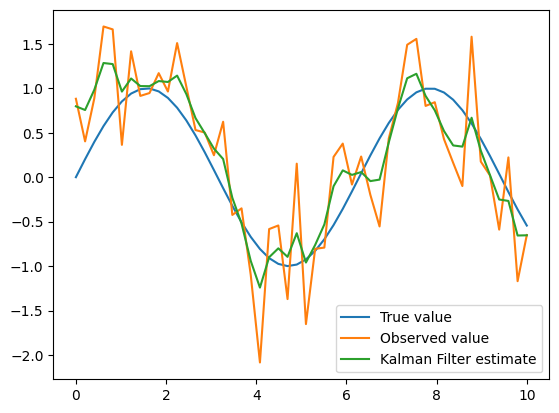

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# Generar un valor verdadero y una observación con ruido
np.random.seed(0)  # para obtener resultados reproducibles
n_timesteps = 50
x = np.linspace(0, 10, n_timesteps)
y_true = np.sin(x)
y_observed = y_true + 0.5 * np.random.randn(n_timesteps)  # agregar ruido a las observaciones

# Inicializar el filtro de Kalman
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)

# Usar el filtro de Kalman para estimar los valores verdaderos
state_means, state_covariances = kf.em(y_observed).smooth(y_observed)

# Graficar los resultados
plt.plot(x, y_true, label='True value')
plt.plot(x, y_observed, label='Observed value')
plt.plot(x, state_means, label='Kalman Filter estimate')
plt.legend()
plt.show()


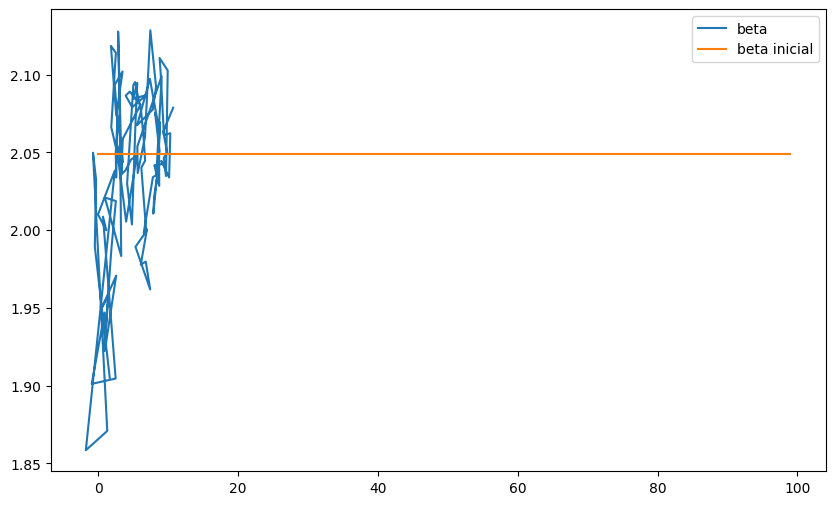

In [134]:
import numpy as np
import pandas as pd
from pykalman import KalmanFilter
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Suponemos dos series de precios hipotéticas
np.random.seed(1)
N = 100  # número de observaciones
x = np.linspace(0, 10, N) + np.random.randn(N)  # serie x
y = 2 * x + np.random.randn(N)  # serie y

# Ajustamos una regresión lineal para obtener los parámetros iniciales para el Filtro de Kalman
model = sm.OLS(y, sm.add_constant(x)).fit()
beta_init = model.params[1]
offset_init = model.params[0]

# Definimos y aplicamos el filtro de Kalman
delta = 1e-3
trans_cov = delta / (1 - delta) * np.eye(2)  # Cómo varían las transiciones
obs_mat = np.vstack([x, np.ones(N)]).T[:, np.newaxis]  # Matriz de observaciones

kf = KalmanFilter(n_dim_obs=1, n_dim_state=2,
                  initial_state_mean=[beta_init, offset_init],
                  initial_state_covariance=np.ones((2, 2)),
                  transition_matrices=np.eye(2),
                  observation_matrices=obs_mat,
                  observation_covariance=1.0,
                  transition_covariance=trans_cov)

state_means, state_covariances = kf.filter(y)

# Creamos un gráfico de los resultados
plt.figure(figsize=(10, 6))
plt.plot(x, state_means[:, 0], label='beta')
plt.plot(np.ones_like(x) * beta_init, label='beta inicial')
plt.legend()
plt.show()



In [131]:
!pip install pykalman


     -------------------------------------- 228.9/228.9 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48442 sha256=2a4d75b5a4af1d07fb238c321dc41a4ebe9021b7c3b5fdd3824aff8bde30e2af
  Stored in directory: c:\users\diego\appdata\local\pip\cache\wheels\7a\68\21\675239322d2bb2e8e1fa317d4bd7b5566a4e82780b25a27f7a
Successfully built pykalman
